In [280]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from astropy.io import fits

In [281]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def load_plz(pattern):
    
    files = sorted(glob.glob(pattern))
    files = map(fits.open, files)
    files = [file[0].data for file in files]
    return np.array(files)
    
def lazy_load_plz(pattern):
    
    files = sorted(glob.glob(pattern))
    files = map(fits.open, files)
    return files

def num_sd(arr):
    
    return np.abs(arr - arr.mean()) / arr.std()
    
def apply_mask(arr, mask):
    
    arr = arr.astype(np.float32)
    
    arr *= mask
    arr[1:-1, 1:-1] += ~mask[1:-1, 1:-1] * 0.25 * \
                      (arr[:-2, 1:-1] + arr[2:, 1:-1] +
                       arr[1:-1, :-2] + arr[1:-1, 2:])
    return arr

In [282]:
flatspecs = load_plz("../../../chris_kiran_jeffrey_lab2/flat*.FIT")


master_flatspec = np.median(flatspecs, axis=0)
master_flatspec /= np.median(flatspecs)

In [283]:
flat_crop = master_flatspec[15:100,:]

In [284]:
starspecs = load_plz("../../../chris_kiran_jeffrey_lab2/star*.FIT")

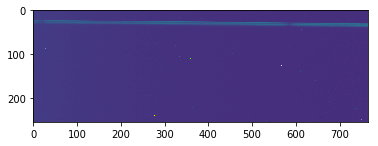

In [285]:
starspecs = load_plz("../../../chris_kiran_jeffrey_lab2/star*.FIT")
from matplotlib.colors import LogNorm

#cropped = starspecs[25:40, :]
starspecs = np.median(starspecs, axis=0)
plt.imshow(starspecs, norm=LogNorm(vmin=8e3, vmax=1e4));
cropped = starspecs[25:40, :]

In [286]:
flat_fitfunc = np.poly1d(np.polyfit(x, np.mean(flat_crop, axis=0),N))
master_flat = np.mean(flat_crop,axis=0)/flat_fitfunc(x)

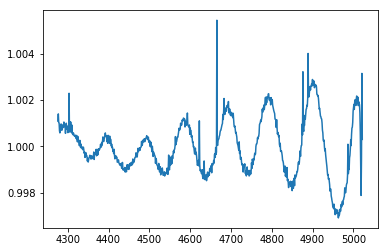

In [287]:
plt.plot(x, master_flat);
N =2
flat_fitfunc = np.poly1d(np.polyfit(x, np.mean(flat_crop, axis=0),N))

In [288]:
y = np.mean(cropped, axis=0)/master_flat
for i in range(500,len(y)):
    if y[i] == np.min(y[500:650]):
        H_abs_loc = i
shift = 4861 - H_abs_loc

ang_per_pix = 0.9747780194475906
#from lab0
temp = 11361
temp_err = 66 
h = 6.626e-34
c = 3*10**8
k = 1.381e-23
x = np.linspace(shift,shift + cropped.shape[1]*ang_per_pix, num=len(y))

In [289]:
def blackbody(Lambda, T):
    return 2*np.pi*h*c**2/Lambda**5/(np.exp(h*c/(Lambda*k*T))-1)    

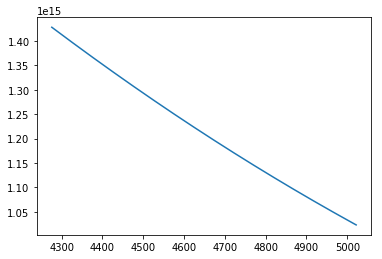

In [290]:
plt.plot(x, blackbody(x*10**(-10), temp));

In [291]:
y[500]/blackbody( x[500]*10**(-10),temp)


7.331430035995821e-12

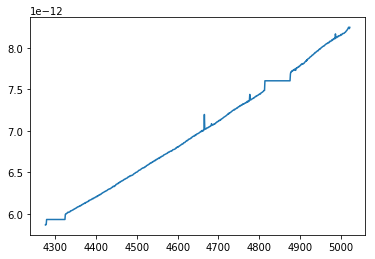

In [292]:
y = y/blackbody(x*10**(-10),temp)
N = 2
data_fitfunc = np.poly1d(np.polyfit(x,y,N))
for i in range(len(y)):
    if 2<i<50 :
        y[i]=(y[1]+y[50])/2
    if 550<i<615:
        y[i]=(y[549]+y[620])/2
plt.plot(x,y)
#plt.plot(x,fitfunc(x));

In [293]:
N = 2
data_fitfunc = np.poly1d(np.polyfit(x*1e-10,y,N)) #creates a function that takes in a point and fits it to all data

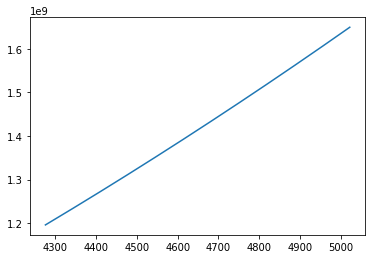

In [294]:
plt.plot(x,data_fitfunc(x))

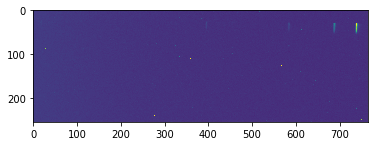

In [295]:
nebulae = sorted(glob.glob("../../../chris_kiran_jeffrey_lab2/nebula*.FIT"))
nebulae = list(map(fits.open, nebulae[:]))
nebulae = nebulae[0][0].data
plt.imshow(nebulae, norm=LogNorm(vmin=8e3, vmax=1e4));

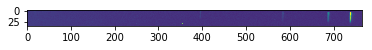

In [296]:
nebulae = nebulae[25:60, :]
plt.imshow(nebulae, norm=LogNorm(vmin=8e3, vmax=1e4));

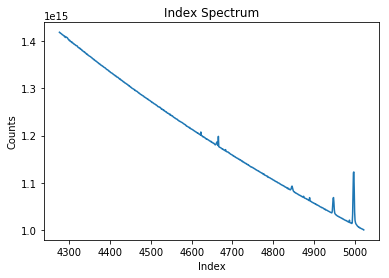

In [297]:
neb_norm = nebulae/data_fitfunc(x*1e-10)
mean = np.mean(neb_norm, axis=0)
ang_per_pix = 0.9747780194475906
#use shift to display angstroms of location
plt.plot(np.linspace(shift,shift + neb_norm.shape[1]*ang_per_pix, num=len(mean)),mean) 
#.97 is the angstroms per pixel that was previously calculated in lab0
plt.title("Index Spectrum")
plt.xlabel("Index")
plt.ylabel("Counts");